In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest
import warnings
%matplotlib inline

In [2]:
warnings.filterwarnings('ignore')

In [3]:
titanic = pd.read_csv('train.csv')

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
from ydata_profiling import ProfileReport

In [6]:
profile = ProfileReport(titanic,title='Titanic_treino')

In [7]:
profile.to_file('Titanic_treino.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
titanic.shape


(891, 12)

In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
titanic.loc[titanic.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [13]:
titanic.loc[titanic.Embarked.isnull(),'Embarked'] = "S"

In [14]:
titanic.loc[titanic.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [15]:
titanic.loc[(titanic.Age.isnull()) & (titanic.Cabin.isnull())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [16]:
def getTitle(text):
    title = text[text.find(',')+2 : text.find('.')]
    if title in['Mr','Mrs','Miss','Master']:
        return title
    else:
        return 'Others'

titanic['Title'] = titanic.Name.apply(getTitle)

In [17]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [18]:
titanic.Title.value_counts()

Title
Mr        517
Miss      182
Mrs       125
Master     40
Others     27
Name: count, dtype: int64

In [19]:
titanic.Age.median()

28.0

In [20]:
titanic.groupby(['Pclass','Sex'])['Age'].mean()

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

In [21]:
titanic.groupby(['Title','Sex'])['Age'].mean()

Title   Sex   
Master  male       4.574167
Miss    female    21.773973
Mr      male      32.368090
Mrs     female    35.898148
Others  female    32.857143
        male      45.894737
Name: Age, dtype: float64

In [22]:
titanic.groupby(['Title', 'Sex'])['Age'].transform('mean')

0      32.368090
1      35.898148
2      21.773973
3      35.898148
4      32.368090
         ...    
886    45.894737
887    21.773973
888    21.773973
889    32.368090
890    32.368090
Name: Age, Length: 891, dtype: float64

In [23]:
titanic['Age'] = titanic.Age.fillna(titanic.groupby(['Title', 'Sex'])['Age'].transform('mean'))

In [24]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

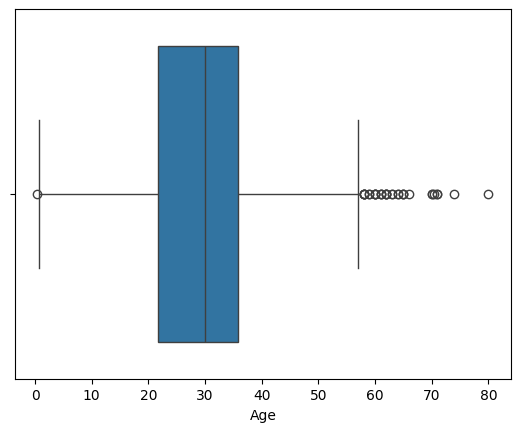

In [25]:
sns.boxplot(x=titanic['Age'])
plt.show()

In [26]:
titanic.Cabin.value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [27]:
titanic = titanic.drop('Cabin',axis=1)

In [28]:
def limits(coluna):
    Q1 = coluna.quantile(0.25) #quantile = quartil
    Q3 =  coluna.quantile(0.75)
    amplitude = Q3 - Q1
    limite_inferior = Q1 - 1.5 * amplitude
    limite_superior = Q3 + 1.5 * amplitude
    return limite_inferior, limite_superior



def boxplot(coluna):
    fig,(ax1,ax2) = plt.subplots(1,2)
    fig.set_size_inches(15,5)
    sns.boxplot(x=coluna,ax=ax1)
    ax2.set_xlim(limits(coluna))
    sns.boxplot(x=coluna,ax=ax2)
    return

def delete_outliers(data, column_name):
    total_lines = data.shape[0]
    inferior_limits, superior_limits = limits(data[column_name])
    data = data.loc[(data[column_name] >= inferior_limits) & (data[column_name] <= superior_limits), :]
    removed_lines = total_lines - data.shape[0]
    return data, removed_lines

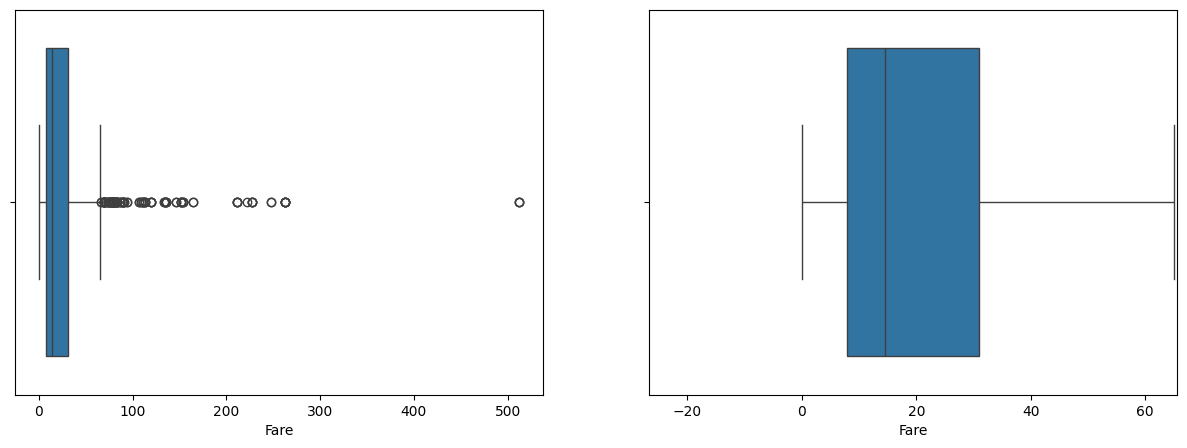

In [29]:
boxplot(titanic.Fare)
plt.show()

In [30]:
titanic.loc[titanic.Fare > 500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C,Miss
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C,Mr
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C,Mr


In [31]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [32]:
titanic.nunique() #cardinalidade

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             93
SibSp            7
Parch            7
Ticket         681
Fare           248
Embarked         3
Title            5
dtype: int64

In [33]:
# Name,PassengerId,Ticket Colum Is uselles for the IA model
titanic = titanic.drop('Name',axis=1)
titanic = titanic.drop('PassengerId',axis=1)
titanic = titanic.drop('Ticket',axis=1)

In [34]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [35]:
titanic[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
titanic[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
titanic[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)
titanic[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


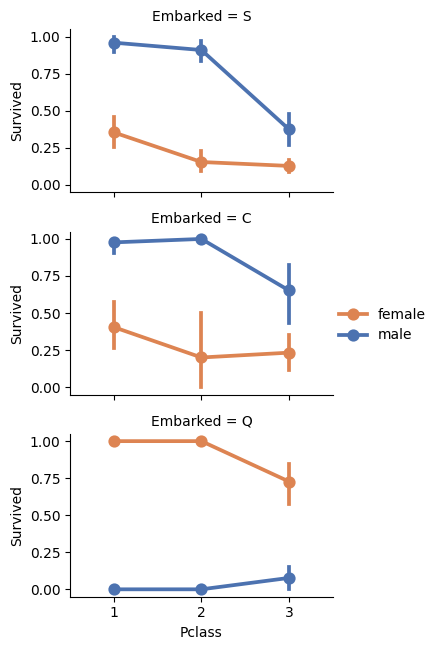

In [36]:
grid = sns.FacetGrid(titanic, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

plt.show()

In [37]:
scaler = RobustScaler()

In [38]:
scaler = scaler.fit(titanic.Fare.values.reshape(-1,1))

In [39]:
titanic['Fare'] = scaler.transform(titanic.Fare.values.reshape(-1,1))

In [40]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,-0.312011,S,Mr
1,1,1,female,38.0,1,0,2.461242,C,Mrs
2,1,3,female,26.0,0,0,-0.282777,S,Miss
3,1,1,female,35.0,1,0,1.673732,S,Mrs
4,0,3,male,35.0,0,0,-0.277363,S,Mr


In [41]:
titanic.Fare.describe()

count    891.000000
mean       0.768745
std        2.152200
min       -0.626005
25%       -0.283409
50%        0.000000
75%        0.716591
max       21.562738
Name: Fare, dtype: float64

In [42]:
# separating the data into variables in the colum fare
(count,mean,std,min_,q1,median,q3,max_) = titanic.Fare.describe()

In [43]:
# calculating the minimal in the RobustScaler method
(min_ - median)/(q3-q1)

-0.6260047813734322

In [44]:
(max_ - median)/(q3-q1)

21.56273820248077

In [45]:
scaler = scaler.fit(titanic.Age.values.reshape(-1,1))

In [46]:
titanic['Age'] = scaler.transform(titanic.Age.values.reshape(-1,1))

In [47]:
titanic.Age.describe()

count    891.000000
mean      -0.017061
std        0.940363
min       -2.094282
25%       -0.582408
50%        0.000000
75%        0.417592
max        3.540030
Name: Age, dtype: float64

In [48]:
titanic.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,-0.566405,1,0,-0.312011,S,Mr
1,1,1,female,0.566405,1,0,2.461242,C,Mrs


In [49]:
titanic.Embarked.value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [50]:
titanic.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [51]:
titanic['Is_male']= titanic.Sex.apply(lambda x: 1 if x== 'male' else 0 )

In [52]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Is_male
0,0,3,male,-0.566405,1,0,-0.312011,S,Mr,1
1,1,1,female,0.566405,1,0,2.461242,C,Mrs,0
2,1,3,female,-0.283202,0,0,-0.282777,S,Miss,0
3,1,1,female,0.354003,1,0,1.673732,S,Mrs,0
4,0,3,male,0.354003,0,0,-0.277363,S,Mr,1


In [53]:
titanic = titanic.drop('Sex',axis=1)

In [54]:
X =  titanic.drop('Survived',axis=1)
y = titanic.Survived

In [55]:
#limitando o numero de linhas para o encoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

In [56]:
encoder = encoder.fit(X[['Embarked','Title']])

In [57]:
encoder.transform(X[['Embarked','Title']]).toarray()

array([[0., 0., 1., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [58]:
enconder_df =  pd.DataFrame(encoder.transform(X[['Embarked','Title']]).toarray())

In [59]:
enconder_df.head()

,0,1,2,3,4,5,6,7
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [60]:
print(encoder.categories_)
print(encoder.get_feature_names_out())

[array(['C', 'Q', 'S'], dtype=object), array(['Master', 'Miss', 'Mr', 'Mrs', 'Others'], dtype=object)]
['Embarked_C' 'Embarked_Q' 'Embarked_S' 'Title_Master' 'Title_Miss'
 'Title_Mr' 'Title_Mrs' 'Title_Others']


In [61]:
enconder_df.columns = encoder.get_feature_names_out()

In [62]:
enconder_df.head()

,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [63]:
titanic_encoded = pd.concat([titanic,enconder_df],axis=1)

In [64]:
titanic_encoded = titanic_encoded.drop('Embarked',axis=1)
titanic_encoded = titanic_encoded.drop('Title',axis=1)

In [65]:
titanic_encoded.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Is_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others
0,0,3,-0.566405,1,0,-0.312011,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1,1,0.566405,1,0,2.461242,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [66]:
titanic_encoded = titanic_encoded.drop('Embarked_Q',axis=1)
titanic_encoded = titanic_encoded.drop('Title_Others',axis=1)


In [67]:
# Criando o nosso seletor
seletor = SelectKBest(k=12)

In [68]:
X =  titanic_encoded.drop('Survived',axis=1)
y = titanic_encoded.Survived

In [69]:
# Fazendo o fit com os dados
seletor = seletor.fit(X,y)

In [70]:
# Visualizando os scores
seletor.scores_

array([115.03127219,   7.15661338,   1.1105722 ,   5.96346384,
        63.03076423, 372.4057236 ,  25.895987  ,  20.37445988,
         6.50363454, 106.50905113, 383.94549531, 115.46108631])

In [71]:
# Visualizando as colunas
seletor.feature_names_in_

array(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Is_male', 'Embarked_C',
       'Embarked_S', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs'], dtype=object)

In [72]:
list_seletor  = list(zip(seletor.scores_,seletor.feature_names_in_))

In [73]:
list_seletor

[(115.03127218827744, 'Pclass'),
 (7.156613378443109, 'Age'),
 (1.1105722041132329, 'SibSp'),
 (5.963463836603494, 'Parch'),
 (63.03076422804465, 'Fare'),
 (372.40572360221483, 'Is_male'),
 (25.89598699556588, 'Embarked_C'),
 (20.374459882803, 'Embarked_S'),
 (6.503634538831682, 'Title_Master'),
 (106.50905113123808, 'Title_Miss'),
 (383.94549531005066, 'Title_Mr'),
 (115.461086310909, 'Title_Mrs')]

In [74]:
# Ordenando pela pontuação
list_seletor.sort(reverse=True)

In [75]:
# Listagem ordenada
for score, feature in list_seletor:
    print(f'Feature: {feature}, Score: {score}')

Feature: Title_Mr, Score: 383.94549531005066
Feature: Is_male, Score: 372.40572360221483
Feature: Title_Mrs, Score: 115.461086310909
Feature: Pclass, Score: 115.03127218827744
Feature: Title_Miss, Score: 106.50905113123808
Feature: Fare, Score: 63.03076422804465
Feature: Embarked_C, Score: 25.89598699556588
Feature: Embarked_S, Score: 20.374459882803
Feature: Age, Score: 7.156613378443109
Feature: Title_Master, Score: 6.503634538831682
Feature: Parch, Score: 5.963463836603494
Feature: SibSp, Score: 1.1105722041132329


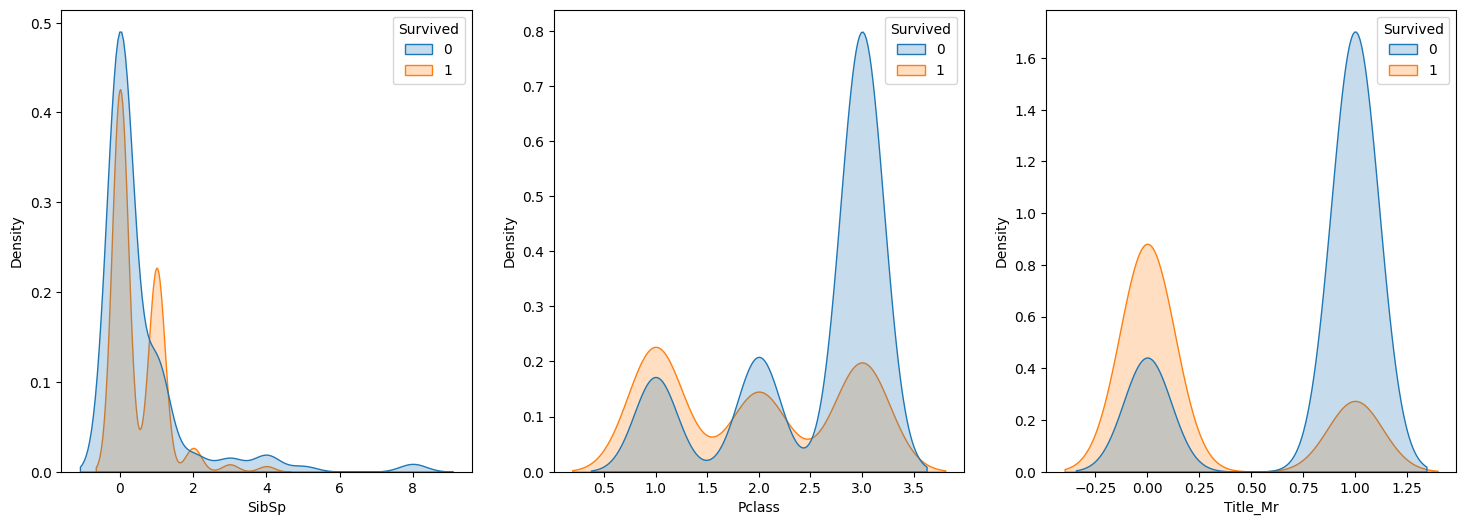

In [76]:


fig, ax = plt.subplots(ncols=3,figsize=(18,6))

sns.kdeplot(data=X, x='SibSp', hue=y, ax=ax[0], fill=True)
sns.kdeplot(data=X, x='Pclass', hue=y, ax=ax[1], fill=True)
sns.kdeplot(data=X, x='Title_Mr', hue=y, ax=ax[2], fill=True)

plt.show()

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
model = LogisticRegression(max_iter=200)

In [79]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [80]:
y_pred = model.predict(X_test)

In [81]:
y_pred_proba = model.predict_proba(X_test)

In [82]:
y_pred[:5]

array([1, 0, 0, 1, 1], dtype=int64)

In [83]:
y_pred_proba[:5]

array([[0.3122332 , 0.6877668 ],
       [0.81231064, 0.18768936],
       [0.88678221, 0.11321779],
       [0.17210878, 0.82789122],
       [0.32244632, 0.67755368]])

In [84]:
def evaluate_model(model_name, y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    evaluation = f'A.I model {model_name}:\n'
    evaluation += f'Acurácia: {accuracy:.2f}\n'
    evaluation += f'Precision: {precision:.2f}\n'
    evaluation += f'Recall: {recall:.2f}\n'
    evaluation += f'F1-score: {f1:.2f}\n'
    evaluation += f'Matriz de Confusão:\n{conf_matrix}\n'
    class_report = classification_report(y_test, y_pred)
    evaluation += f'Relatório de Classificação:\n{class_report}\n'
    return evaluation

In [85]:
model_RF = RandomForestClassifier()
model_LR = LogisticRegression()
model_KNN = KNeighborsClassifier()
model_SVM = SVC()

models =  {'RandomForest':model_RF,
           'LogisticRegression':model_LR,
           'KNN': model_KNN,
            'SVM': model_SVM
           }

In [86]:
for name_model,model in models.items():
    #train
    model.fit(X_train,y_train)
    #test
    prediction = model.predict(X_test)
    print(evaluate_model(name_model,y_test,prediction))

A.I model RandomForest:
Acurácia: 0.85
Precision: 0.82
Recall: 0.81
F1-score: 0.82
Matriz de Confusão:
[[92 13]
 [14 60]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       105
           1       0.82      0.81      0.82        74

    accuracy                           0.85       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179


A.I model LogisticRegression:
Acurácia: 0.82
Precision: 0.77
Recall: 0.78
F1-score: 0.78
Matriz de Confusão:
[[88 17]
 [16 58]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       105
           1       0.77      0.78      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179


A.I model KNN:
Acurácia: 0.82
Precisio

In [87]:
# modelo Escolhido RandomForest
model_RF.fit(X_train,y_train)

RandomForestClassifier()

In [88]:
y_pred = model_RF.predict(X_test)

In [89]:
y_pred_proba = model_RF.predict_proba(X_test)

In [90]:
y_pred[:5]

array([1, 0, 0, 1, 0], dtype=int64)

In [91]:
y_pred_proba[:5]

array([[0.11      , 0.89      ],
       [0.91      , 0.09      ],
       [0.91666667, 0.08333333],
       [0.02      , 0.98      ],
       [0.66      , 0.34      ]])

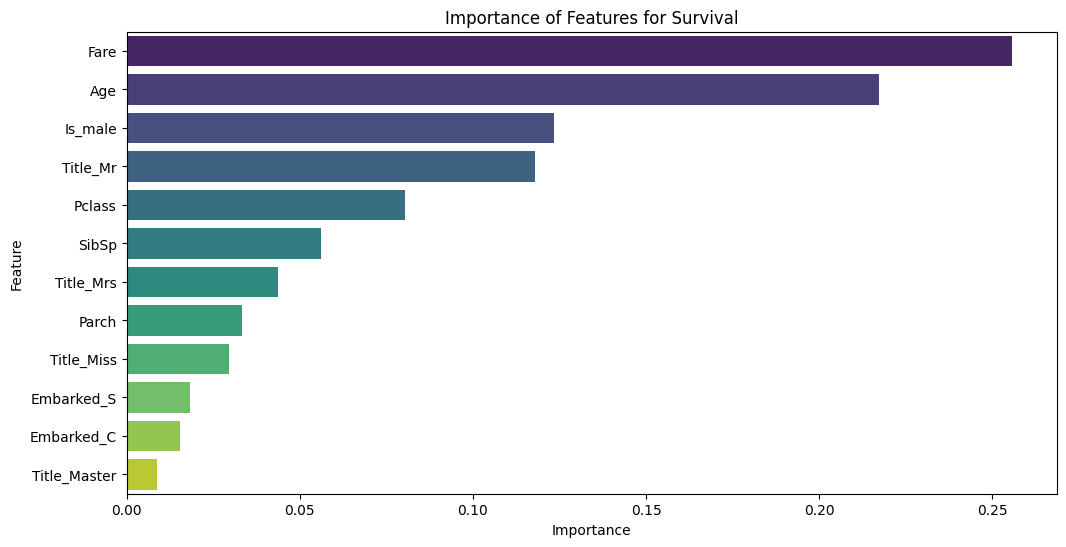

In [92]:
importancias = model_RF.feature_importances_


feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importancias
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Importance of Features for Survival')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [93]:
# A.I model RandomForest: it is the best model to make the prediction

In [94]:
y_pred

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [96]:

titanic_copy = titanic.copy()

X_test_with_index = pd.DataFrame(X_test, columns=X.columns)
X_test_with_index['Index'] = X_test_with_index.index


resultados = pd.DataFrame({
    'Probability_Not_Surviving': y_pred_proba[:, 0],
    'Probability_Surviving': y_pred_proba[:, 1],
    'Previsao': y_pred,
    'Index': X_test_with_index['Index']
})


titanic_copy = titanic_copy.reset_index()
titanic_copy = pd.merge(titanic_copy, resultados, how='left', left_on='index', right_on='Index')


titanic_copy.drop(columns=['Index'], inplace=True)


survived_people = titanic_copy[['Probability_Not_Surviving','Probability_Surviving','Previsao']]
survived_people = survived_people.dropna()

In [100]:
titanic_copy.dropna()

,index,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,Is_male,Probability_Not_Surviving,Probability_Surviving,Previsao
5,5,0,3,0.167662,0,0,-0.259680,Q,Mr,1,0.931263,0.068737,0.0
10,10,1,3,-1.840815,1,1,0.097265,S,Miss,0,0.200000,0.800000,1.0
23,23,1,1,-0.141601,0,0,0.911484,S,Mr,1,0.490000,0.510000,1.0
25,25,1,3,0.566405,1,5,0.733373,S,Mrs,0,0.960000,0.040000,0.0
30,30,0,1,0.708006,0,0,0.574570,C,Others,1,0.620000,0.380000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,876,0,3,-0.708006,0,0,-0.199588,S,Mr,1,0.980000,0.020000,0.0
877,877,0,3,-0.778807,0,0,-0.284041,S,Mr,1,0.988333,0.011667,0.0
885,885,0,3,0.637205,0,5,0.635386,Q,Mrs,0,0.750000,0.250000,0.0
886,886,0,2,-0.212402,0,0,-0.062981,S,Others,1,0.850000,0.150000,0.0


In [98]:
survived_people[['Probability_Not_Surviving', 'Probability_Surviving']] = survived_people[['Probability_Not_Surviving', 'Probability_Surviving']].applymap(lambda x: round(x, 2))

In [99]:
survived_people

,Probability_Not_Surviving,Probability_Surviving,Previsao
5,0.93,0.07,0.0
10,0.20,0.80,1.0
23,0.49,0.51,1.0
25,0.96,0.04,0.0
30,0.62,0.38,0.0
...,...,...,...
876,0.98,0.02,0.0
877,0.99,0.01,0.0
885,0.75,0.25,0.0
886,0.85,0.15,0.0
